In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import textwrap

Dans ce notebook, je utilise le marches_publics_normalized_data.csv et le filtre pour Marseille.

In [3]:
df = pd.read_csv('marches_publics_normalized_data.csv', delimiter=';', error_bad_lines=False)


/var/folders/78/hj1hmz4d1ws3tj62xkrgpzfr0000gn/T/ipykernel_62181/1933942321.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('marches_publics_normalized_data.csv', delimiter=';', error_bad_lines=False)
/var/folders/78/hj1hmz4d1ws3tj62xkrgpzfr0000gn/T/ipykernel_62181/1933942321.py:1: DtypeWarning: Columns (1,2,7,8,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('marches_publics_normalized_data.csv', delimiter=';', error_bad_lines=False)


In [4]:
marseille_df = df[df['nom'].str.contains('Bouches|Marseille', case=False, na=False)]
marseille_df.head()   

,Unnamed: 0,codecpv,acheteur_nom,montant,datenotification,lieuexecution_typecode,acheteur_id,lieuexecution_code,uid,formeprix,...,objet,nature,dureemois,procedure,id,_type,siren,nom,type,titulaires
65165,292478,18143000-3,NaN,150000.0,2021-08-09,Code postal,20005480700017,13567,200054807000172021Z210229A0000,Ferme,...,ACCORD CADRE RESERVE DE FOURNITURE DE MASQUES ...,Accord-cadre,12,Procédure adaptée,2021Z210229A0000,NaN,200054807,Métropole d'Aix-Marseille-Provence,MET,['APF FRANCE HANDICAP']
65664,293193,50100000-6,NaN,1240000.0,2021-11-02,Code postal,20005480700017,13567,200054807000172021Z210304F0000,Révisable,...,Z210304F00 LOT 1 PRESTATION DE MAINTENANCE PRE...,Accord-cadre,48,Appel d'offres ouvert,2021Z210304F0000,NaN,200054807,Métropole d'Aix-Marseille-Provence,MET,"['GARAGE GANCI'], ['GARAGE DU PLAN'], ['E2L AU..."
65665,293195,42923100-3,NaN,2077500.0,2022-04-13,Code postal,20005480700017,13567,200054807000172022Z220015F0000,Révisable,...,"Z220015F00 - LOT 1 : FOURNITURE, POSE ET MAINT...",Accord-cadre,48,Appel d'offres ouvert,2022Z220015F0000,NaN,200054807,Métropole d'Aix-Marseille-Provence,MET,['MICROMEGA']
65666,293196,45000000-7,NaN,1181867.3,2022-07-19,Code postal,20005480700017,13567,200054807000172022T220388A0000,Ferme et actualisable,...,T220388A00 LOT 1 : AMENAGEMENTS DE SURFACE ET...,Marché,8,Procédure adaptée,2022T220388A0000,NaN,200054807,Métropole d'Aix-Marseille-Provence,MET,['GREGORI PROVENCE']
65675,293212,71336000-2,NaN,60000.0,2022-01-26,Code postal,20005480700017,13567,200054807000172022Z222010A0000,Ferme,...,MISSION D'INGENIERIE FINANCIERE POUR LA MISE E...,Accord-cadre,12,Procédure adaptée,2022Z222010A0000,NaN,200054807,Métropole d'Aix-Marseille-Provence,MET,['FCL']


Le data pour Marseille (en fait, le metropole) est assez 'clean':

In [5]:
marseille_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1027 entries, 65165 to 451880
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1027 non-null   int64  
 1   codecpv                 1027 non-null   object 
 2   acheteur_nom            8 non-null      object 
 3   montant                 1027 non-null   float64
 4   datenotification        1027 non-null   object 
 5   lieuexecution_typecode  1027 non-null   object 
 6   acheteur_id             1027 non-null   int64  
 7   lieuexecution_code      1027 non-null   object 
 8   uid                     1027 non-null   object 
 9   formeprix               1027 non-null   object 
 10  datepublicationdonnees  1027 non-null   object 
 11  lieuexecution_nom       1027 non-null   object 
 12  objet                   1027 non-null   object 
 13  nature                  1027 non-null   object 
 14  dureemois               1027 non-n

**NOTES**

**FRANCAIS**

La Métropole d'Aix-Marseille-Provence est beaucoup plus encline à utiliser l'appel d'offres ouvert que l'acheteur moyen dans l'ensemble des données. 
La Métropole d'Aix-Marseille-Provence effectue 69% de ses achats de cette manière et 22% en « procédure adaptée », par rapport à l'ensemble des acheteurs qui utilisent 61% en « procédure adaptée » et 33% en « appel d'offres ouvert

Cela dit, la Métropole d'Aix-Marseille-Provence est plus de deux fois plus susceptible d'utiliser un processus décrit comme « Marché négocié sans publicité ni mise en concurrence préalable » !e adaptée" et "appel d'offres ouvert" désignent des procédures de marchés publics, mais ils diffèrent en termes de formalité, de flexibilité et de la valeur des contrats auxquels ils s'appliquent généralement. Voici les principales différences :

Procédure Adaptée (Procédure Adaptée) :

Flexibilité : Cette procédure offre plus de flexibilité et est moins formelle que l'« appel d'offres ouvert ».
Valeur du Contrat : Elle est généralement utilisée pour des contrats inférieurs à certains seuils de l'UE, qui sont sujets à des changements mais s'appliquent généralement à des contrats de moindre valeur.
Processus de Sélection : L'autorité contractante peut négocier avec les fournisseurs et adapter la procédure aux besoins spécifiques du contrat. Cela peut inclure des négociations directes avec des fournisseurs potentiels.
Publicité : Bien qu'il y ait encore une exigence de publicité et de concurrence, elle est moins stricte que dans une procédure ouverte.
Appel d'Offres Ouvert (Procédure d'Appel d'Offres Ouvert) :

Formalité : Ils'agit d'une procédure plus formelle et structurée avec des règles strictes pour garantir la transparence et l'égalité de traitement de tous les soumissionnaires.
Valeur du Contrat : Elle est généralement utilisée pour des contrats supérieurs aux seuils de l'UE, qui sont des contrats de plus grande valeur.
Processus de Sélection : Le processus implique un appel public à la concurrence, et toute partie intéressée peut soumettre une offre. La sélection est basée sur des critères prédéfinis, et il n'y a pas de négociation sur les termes de l'appel d'offres.
Publicité : Il y a une obligation de publicité large, généralement par le biais de publications officielles, pour s'assurer que tous les fournisseurs potentiels sont informés de l'opportunité.
En résumé, la « procédure adaptée » est plus flexible et adaptée aux contrats de moindre importance, tandis que l'« appel d'offres ouvert » est plus formel et utilisé pour des contrats de plus grande valeur afin de garantir la transparence et la concurrence

**ENGLISH**

The Métropole d'Aix-Marseille-Provence is much more inclined to use 'appel d'offres ouvert' than the average purchaser across the data. 
Métropole d'Aix-Marseille-Provence makes 69% of purchases that way and 22% 'procédure adaptée', compared to the overall which sees 61% 'procédure adaptée' and 33% 'appel d'offres ouvert'

That said - Métropole d'Aix-Marseille-Provence is more than twice as likely to use a process described as 'Marché négocié sans publicité ni mise en concurrence préalable'!

From Mistral:
In France, both "procédure adaptée" and "appel d'offres ouvert" are public procurement procedures, but they differ in terms of formality, flexibility, and the value of the contracts they typically apply to. Here's a breakdown of the main differences:

Procédure Adaptée (Adapted Procedure):

Flexibility: This procedure offers more flexibility and is less formal compared to the "appel d'offres ouvert."
Contract Value: It is generally used for contracts below certain EU thresholds, which are subject to change but typically apply to lower-value contracts.
Selection Process: The contracting authority can negotiate with suppliers and adapt the procedure to the specific needs of the contract. This can include direct negotiations with potential suppliers.
Publicity: While there is still a requirement for some level of advertising and competition, it is less stringent than in an open procedure.
Appel d'Offres Ouvert (Open Tender Procedure):

Formality: This is a more formal and structured procedure with strict rules to ensure transparency and equal treatment of all bidders.
Contract Value: It is typically used for contracts above the EU thresholds, which are higher-value contracts.
Selection Process: The process involves a public call for tenders, and any interested party can submit a bid. The selection is based on pre-defined criteria, and there is no negotiation on the terms of the tender.
Publicity: There is a mandatory requirement for wide publicity, usually through official publications, to ensure that all potential suppliers are aware of the opportunity.
In summary, the "procédure adaptée" is more flexible and suitable for smaller contracts, while the "appel d'offres ouvert" is more formal and used for larger, higher-value contracts to ensure transparency and competition.





In [6]:
procedure_counts_ms = marseille_df['procedure'].value_counts().reset_index()
procedure_counts_ms.columns = ['procedure', 'count']

total_count = procedure_counts_ms['count'].sum()

procedure_counts_ms['percentage'] = ((procedure_counts_ms['count'] / total_count) * 100).round(0).astype(int)

procedure_counts_ms

,procedure,count,percentage
0,Appel d'offres ouvert,713,69
1,Procédure adaptée,230,22
2,Marché négocié sans publicité ni mise en concu...,76,7
3,Procédure négociée avec mise en concurrence pr...,4,0
4,Appel d'offres restreint,2,0
5,Dialogue compétitif,2,0


In [10]:
procedure_counts_ms = marseille_df['procedure'].value_counts().reset_index()
procedure_counts_ms.columns = ['procedure', 'count']

total_count = procedure_counts_ms['count'].sum()
procedure_counts_ms['percentage'] = ((procedure_counts_ms['count'] / total_count) * 100).round(0).astype(int)

procedure_counts_ms

,procedure,count,percentage
0,Appel d'offres ouvert,713,69
1,Procédure adaptée,230,22
2,Marché négocié sans publicité ni mise en concu...,76,7
3,Procédure négociée avec mise en concurrence pr...,4,0
4,Appel d'offres restreint,2,0
5,Dialogue compétitif,2,0


In [11]:

total_count_all = df['procedure'].value_counts().sum()

procedure_counts_all = df['procedure'].value_counts().reset_index()
procedure_counts_all.columns = ['procedure', 'count']
procedure_counts_all['percentage'] = ((procedure_counts_all['count'] / total_count_all) * 100).round(0).astype(int)

total_count_filtered = marseille_df['procedure'].value_counts().sum()

procedure_counts_filtered = marseille_df['procedure'].value_counts().reset_index()
procedure_counts_filtered.columns = ['procedure', 'count']
procedure_counts_filtered['percentage'] = ((procedure_counts_filtered['count'] / total_count_filtered) * 100).round(0).astype(int)


merged_counts = pd.merge(procedure_counts_all, procedure_counts_filtered, on='procedure', suffixes=('_all', '_filtered'))
merged_counts.rename(columns={'count_filtered': 'count_Aix_mars'}, inplace=True)
merged_counts.rename(columns={'percentage_filtered': 'percentage_Aix_mars'}, inplace=True)

merged_counts

,procedure,count_all,percentage_all,count_Aix_mars,percentage_Aix_mars
0,Procédure adaptée,285290,61,230,22
1,Appel d'offres ouvert,155151,33,713,69
2,Marché négocié sans publicité ni mise en concu...,12357,3,76,7
3,Procédure négociée avec mise en concurrence pr...,3988,1,4,0
4,Appel d'offres restreint,1286,0,2,0
5,Dialogue compétitif,746,0,2,0


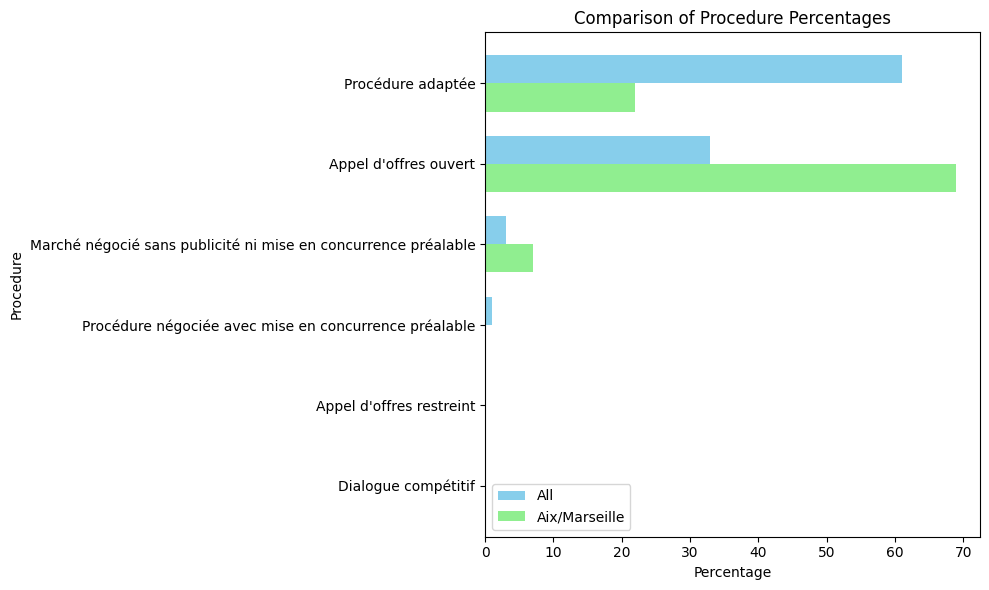

In [12]:
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(merged_counts))

plt.barh(index, merged_counts['percentage_all'], bar_width, label='All', color='skyblue')
plt.barh([i + bar_width for i in index], merged_counts['percentage_Aix_mars'], bar_width, label='Aix/Marseille', color='lightgreen')

plt.xlabel('Percentage')
plt.ylabel('Procedure')
plt.title('Comparison of Procedure Percentages')
plt.yticks([i + bar_width / 2 for i in index], merged_counts['procedure'])
plt.legend()

plt.tight_layout()
plt.gca().invert_yaxis()  
plt.show()

In [13]:
marseille_df['datenotification'] = pd.to_datetime(marseille_df['datenotification'], errors='coerce')

marseille_df['year'] = marseille_df['datenotification'].dt.year
yearly_montant_sum = marseille_df.groupby('year')['montant'].sum().reset_index()
pd.options.display.float_format = '{:,.2f}'.format

yearly_montant_sum

/var/folders/78/hj1hmz4d1ws3tj62xkrgpzfr0000gn/T/ipykernel_62181/1839142805.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marseille_df['datenotification'] = pd.to_datetime(marseille_df['datenotification'], errors='coerce')
/var/folders/78/hj1hmz4d1ws3tj62xkrgpzfr0000gn/T/ipykernel_62181/1839142805.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marseille_df['year'] = marseille_df['datenotification'].dt.year


,year,montant
0,2021,"1,886,425,794.37"
1,2022,"1,908,019,807.07"
2,2023,"526,623,084.16"


In [14]:

total_montant_sum = marseille_df['montant'].sum()
print(f"Total sum of 'montant': {total_montant_sum}")

Total sum of 'montant': 4321068685.6


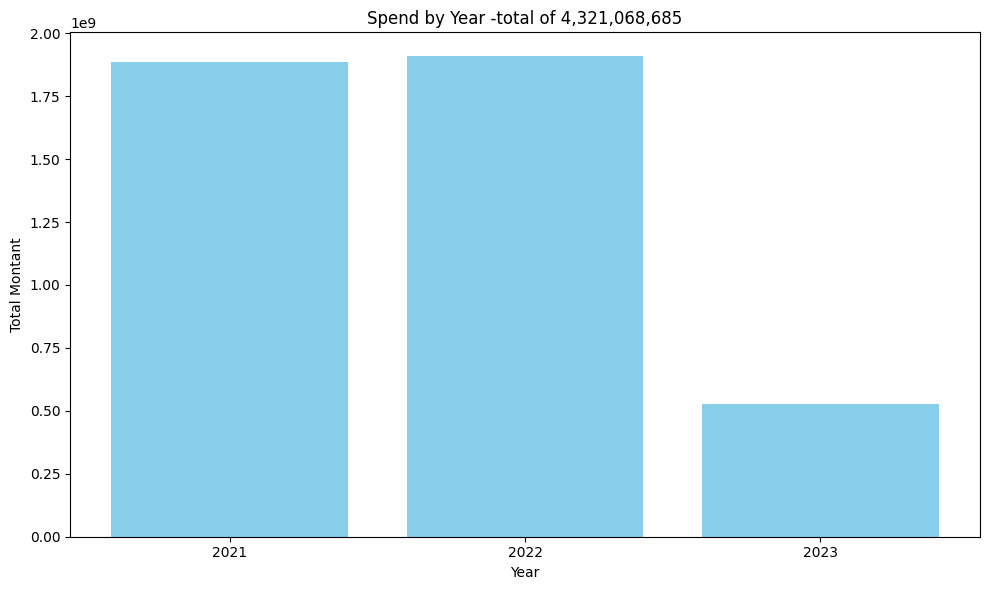

In [15]:
plt.figure(figsize=(10, 6))
plt.bar(yearly_montant_sum['year'], yearly_montant_sum['montant'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Total Montant')
plt.title('Spend by Year -total of 4,321,068,685')
plt.xticks(yearly_montant_sum['year'])  # Ensure all years are shown on the x-axis
plt.tight_layout()

# Display the plot
plt.show()

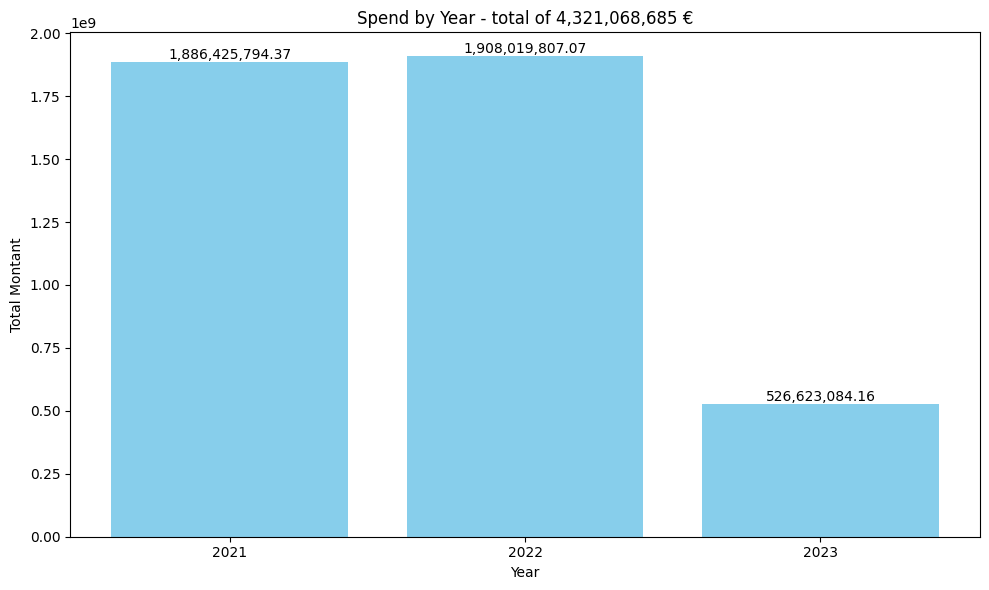

In [16]:
plt.figure(figsize=(10, 6))
bars = plt.bar(yearly_montant_sum['year'], yearly_montant_sum['montant'], color='skyblue')

# Add value labels on each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.2f}', ha='center', va='bottom')

plt.xlabel('Year')
plt.ylabel('Total Montant')
plt.title('Spend by Year - total of 4,321,068,685 €')
plt.xticks(yearly_montant_sum['year'])  # Ensure all years are shown on the x-axis
plt.tight_layout()

# Display the plot
plt.show()

**TOP 10 BUYERS

Below is the 'top 10 buyers' but it quickly becomes obvious that there are doubles here. 
'GTM SUD'], ['BYSTEEL SA'], []'LES TRAVAUX DU ... 
is presumably the same (group?) as 
['LES TRAVAUX DU MIDI'], ['BYSTEEL SA'], ['GTM...	
and 
['LES TRAVAUX DU MIDI'], ['GTM SUD'], ['BYSTEE...	

GTM SUD also appears a lot with 'GREGORI PROVENCE'

In [17]:

total_spent_by_buyer = marseille_df.groupby('titulaires')['montant'].sum().reset_index()
total_spent_by_buyer = total_spent_by_buyer.sort_values(by='montant', ascending=False)

top_10_buyers = total_spent_by_buyer.head(20)
# top_10_buyers
total_spent_by_buyer.to_clipboard(index=False)

total_spent_by_buyer

,titulaires,montant
299,"['GTM SUD'], ['BYSTEEL SA'], ['LES TRAVAUX DU ...","375,760,648.98"
367,"['LES TRAVAUX DU MIDI'], ['BYSTEEL SA'], ['GTM...","250,507,099.32"
136,"['COLAS FRANCE'], ['COLAS PROJECTS']","247,247,038.28"
368,"['LES TRAVAUX DU MIDI'], ['GTM SUD'], ['BYSTEE...","208,755,916.10"
301,"['GTM SUD'], ['GREGORI PROVENCE']","194,090,718.80"
...,...,...
64,['ASSOCIATION FESTIVAL JAZZ DES'],"42,000.00"
595,"['TERRITOIRES URBAINS ARCHITECTES'], ['EURECA ...","41,450.00"
444,['PARME AVOCATS'],"40,000.00"
401,['MOSAICOGROUP'],"39,999.99"


GTM SUD appears 54 times, LES TRAVAUX DU MIDI 23 times, :

In [18]:
search_name = 'GTM SUD'
GTM_SUD = marseille_df[df['titulaires'].str.contains(search_name, case=False, na=False)]

num_rows = GTM_SUD.shape[0]
print(f"Number of rows including {search_name}: {num_rows}")

Number of rows including GTM SUD: 54


/var/folders/78/hj1hmz4d1ws3tj62xkrgpzfr0000gn/T/ipykernel_62181/605092379.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  GTM_SUD = marseille_df[df['titulaires'].str.contains(search_name, case=False, na=False)]


In [19]:
search_name = 'LES TRAVAUX DU MIDI'
TRAVAUX = marseille_df[df['titulaires'].str.contains(search_name, case=False, na=False)]

num_rows = TRAVAUX.shape[0]
print(f"Number of rows including {search_name}: {num_rows}")

Number of rows including LES TRAVAUX DU MIDI: 23


/var/folders/78/hj1hmz4d1ws3tj62xkrgpzfr0000gn/T/ipykernel_62181/4137728195.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  TRAVAUX = marseille_df[df['titulaires'].str.contains(search_name, case=False, na=False)]


In [20]:
search_name = 'GREGORI PROVENCE'
GREG = marseille_df[df['titulaires'].str.contains(search_name, case=False, na=False)]

num_rows = GREG.shape[0]
print(f"Number of rows including {search_name}: {num_rows}")

Number of rows including GREGORI PROVENCE: 18


/var/folders/78/hj1hmz4d1ws3tj62xkrgpzfr0000gn/T/ipykernel_62181/1117361391.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  GREG = marseille_df[df['titulaires'].str.contains(search_name, case=False, na=False)]


In [33]:
search_names = ['GREGORI PROVENCE', 'LES TRAVAUX DU MIDI', 'GTM SUD', 'COLAS FRANCE', 'VINCI CONSTRUCTION', 'BYSTEEL SA', 'EIFFAGE TRAVAUX PUBLICS', 'COLAS PROJECTS', 'VINCI CONSTRUCTION FRANCE', 'VINCI CONSTRUCTION TERRASSEMENT']

results = []

for search_name in search_names:
    filtered_df = marseille_df[marseille_df['titulaires'].str.contains(search_name, case=False, na=False)]
    
    total_montant = filtered_df['montant'].sum()
    count_occurrences = filtered_df.shape[0]
    results.append({'titulaire': search_name, 'total_montant': total_montant, 'count': count_occurrences})

result_table = pd.DataFrame(results)

result_table

,titulaire,total_montant,count
0,GREGORI PROVENCE,"359,789,097.20",18
1,LES TRAVAUX DU MIDI,"960,277,214.06",23
2,GTM SUD,"1,344,208,052.36",54
3,COLAS FRANCE,"373,348,199.18",23
4,VINCI CONSTRUCTION,0.00,0
5,BYSTEEL SA,"960,277,214.06",23
6,EIFFAGE TRAVAUX PUBLICS,0.00,0
7,COLAS PROJECTS,"359,632,055.68",16
8,VINCI CONSTRUCTION FRANCE,0.00,0
9,VINCI CONSTRUCTION TERRASSEMENT,0.00,0


In [34]:

# marseille_df['titulaires'] = marseille_df['titulaires'].str.strip()
marseille_df['titulaires'] = marseille_df['titulaires'].str.strip().str.replace(r'[^\x20-\x7E]', '', regex=True)
df_exploded = marseille_df.assign(titulaires=df['titulaires'].str.split(',')).explode('titulaires')

name_counts = df_exploded['titulaires'].value_counts().reset_index()


name_counts.columns = ['titulaire', 'count']

name_counts.head(20)

/var/folders/78/hj1hmz4d1ws3tj62xkrgpzfr0000gn/T/ipykernel_62181/405232584.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marseille_df['titulaires'] = marseille_df['titulaires'].str.strip().str.replace(r'[^\x20-\x7E]', '', regex=True)


,titulaire,count
0,['GTM SUD'],27
1,['GTM SUD'],27
2,['BYSTEEL SA'],21
3,['COLAS FRANCE'],17
4,['SNEF'],15
5,['VEDESI'],13
6,['GAGNERAUD CONSTRUCTION'],13
7,['ALVAREZ'],12
8,['SINDRES'],12
9,['SOPRA STERIA GROUP'],12


In [36]:

top_20_titulaires = name_counts.head(20)['titulaire'].tolist()
top_20_titulaires = [name.replace('"', '') for name in top_20_titulaires]
top_20_titulaires = top_20_titulaires[1:]

print(top_20_titulaires)

["['GTM SUD']", " ['BYSTEEL SA']", "['COLAS FRANCE']", "['SNEF']", " ['VEDESI']", "['GAGNERAUD CONSTRUCTION']", " ['ALVAREZ']", " ['SINDRES']", "['SOPRA STERIA GROUP']", " ['LES TRAVAUX DU MIDI']", " ['RUBANS BLEUS PASTOURET']", "['EIFFAGE ROUTE GRAND SUD']", " ['ADALTYS']", " ['CHARREL ET ASSOCIES']", " ['COLAS PROJECTS']", "['LES TRAVAUX DU MIDI']", "['GREGORI PROVENCE']", " ['AUTOCARS TELLESCHI']", " ['FARSY']"]


In the above, I've just removed the first element to stop doubling up GTM SUD. This isn't *super* useful, though, as we don't know how to split the costs - this is how much each was involved with but they would split that with the others. 

In [37]:
search_names = top_20_titulaires
results = []

for search_name in search_names:
    filtered_df = marseille_df[marseille_df['titulaires'].str.contains(search_name, case=False, na=False)]
    
    total_montant = filtered_df['montant'].sum()
    count_occurrences = filtered_df.shape[0]
    results.append({'titulaire': search_name, 'total_montant': total_montant, 'count': count_occurrences})

result_table = pd.DataFrame(results)

result_table

,titulaire,total_montant,count
0,['GTM SUD'],"4,321,068,685.60",1027
1,['BYSTEEL SA'],"2,979,756,118.35",564
2,['COLAS FRANCE'],"4,321,068,685.60",1027
3,['SNEF'],"4,321,068,685.60",1027
4,['VEDESI'],"2,850,597,140.39",503
5,['GAGNERAUD CONSTRUCTION'],"4,321,068,685.60",1027
6,['ALVAREZ'],"1,478,359,828.57",385
7,['SINDRES'],"3,139,522,817.27",534
8,['SOPRA STERIA GROUP'],"4,321,068,685.60",1027
9,['LES TRAVAUX DU MIDI'],"3,359,134,631.56",648


In [38]:
num_unique_objet = marseille_df['objet'].nunique()

# Display the number of unique items
print(f"Number of unique items in the 'objet' column: {num_unique_objet}")

Number of unique items in the 'objet' column: 719


In [39]:
top_10_objets = marseille_df['objet'].tolist()
top_10_objets = [name for name in top_10_objets]


print(top_10_objets)

['ACCORD CADRE RESERVE DE FOURNITURE DE MASQUES DE PROTECTION A LECTURE LABIALE', 'Z210304F00 LOT 1 PRESTATION DE MAINTENANCE PREVENTIVE ET CURATIVE DU PARC DE VEHICULES UTILITAIRES EQUIPES DE MOINS DE 3,5 TONNES POUR LE TERRITOIRE MARSEILLE PROVENCE (CT1)', 'Z220015F00 - LOT 1 : FOURNITURE, POSE ET MAINTENANCE DE MATERIEL DE PESAGE DE GESTION DU PESAGE ET DU MATERIEL INFORMATIQUE', "T220388A00  LOT 1 : AMENAGEMENTS DE SURFACE ET RESEAUX DIVERS / REQUALIFICATION DE L'AVENUE DU MARECHAL GALLIENI DANS LE CADRE DE LA RESTRUCTURATION DES VOIES DU VIEUX LA CIOTAT", "MISSION D'INGENIERIE FINANCIERE POUR LA MISE EN OEUVRE DES OPERATIONS DU PLAN DE MOBILITE", 'DIAGNOSTIC ET PRELEVEMENTS POUR IDENTIFICATION DE LA MALADIE DU CHANCRE COLORE DU PLATANE', "T220061A00 - LOT 3 - TRAVAUX D'ENTRETIEN DE EPSACES VERTS DE LA ZAC EMPALLIERES SAINT VICTORET", 'Z220376F00 LOT 2 : LEVES TERRESTRES, MISE A JOUR P.C.R.S., PRESTATIONS DE GEOMETRES / ACQUISITION DE DONNEES TOPOGRAHIQUES ET PHOTOGRAMMETRIQUES, PR

In [40]:
search_objets = top_10_objets
results = []

for objet in search_objets:
    filtered_df = marseille_df[marseille_df['objet'].str.contains(objet, case=False, na=False)]
    
    total_montant = filtered_df['montant'].sum()
    count_occurrences = filtered_df.shape[0]
    results.append({'objet': objet, 'total_montant': total_montant, 'count': count_occurrences})

result_table = pd.DataFrame(results)
result_table = result_table.sort_values(by='total_montant', ascending=False)

result_table

/var/folders/78/hj1hmz4d1ws3tj62xkrgpzfr0000gn/T/ipykernel_62181/2319982474.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  filtered_df = marseille_df[marseille_df['objet'].str.contains(objet, case=False, na=False)]


,objet,total_montant,count
869,Z220339F00 TRAVAUX DU BATIMENT DROMEL-MONTFURO...,"960,277,214.06",23
978,Z220339F00 TRAVAUX DU BATIMENT DROMEL-MONTFURO...,"960,277,214.06",23
807,Z220339F00 TRAVAUX DU BATIMENT DROMEL-MONTFURO...,"960,277,214.06",23
900,Z220339F00 TRAVAUX DU BATIMENT DROMEL-MONTFURO...,"960,277,214.06",23
988,Z220339F00 TRAVAUX DU BATIMENT DROMEL-MONTFURO...,"960,277,214.06",23
...,...,...,...
242,FORMATIONS INCENDIE (MANIPULATION DES EXTINCTE...,0.00,0
118,Z210269F00 LOT 3 : EVALUATION DU NIVEAU DE SEC...,0.00,0
738,OPTIMISATION DU TRAITEMENT QUALITATIF DES EAUX...,0.00,0
375,Z210267F00 LOT 1 : MISSION DE COORDINATION SEC...,0.00,0


In [41]:
object_counts = marseille_df['objet'].value_counts().reset_index()


object_counts.columns = ['objet', 'count']

total_count = object_counts['count'].sum()

object_counts['percentage'] = (object_counts['count'] / total_count) * 100
object_counts.to_clipboard(index=False)

object_counts.head(10)

,objet,count,percentage
0,Z220339F00 TRAVAUX DU BATIMENT DROMEL-MONTFURO...,23,2.24
1,Z210358F00 - SECTEUR SAN1 - EXTENSION NORD SUD...,16,1.56
2,Z210359F00 - LOT 2 : SECTEUR SAS2 - EXTENSION ...,14,1.36
3,Z220308F00 LOT 1 : VRD ET GENIE CIVILE / REALI...,10,0.97
4,Z220151F00 LOT 1 GENIE CIVIL ET AMENAGEMENT,9,0.88
5,LOT 2 OUVRAGES D'ART,8,0.78
6,Z210297F00 : LOT 1 : SCHEMA DIRECTEUR METROPOL...,7,0.68
7,Z210251F00 - LOT 1 : TERRITOIRE SUD - MISSION ...,7,0.68
8,EXTENSIONS NORD-SUD DU TRAMWAY DE MARSEILLE - ...,6,0.58
9,Z210277F00 LOT 1 : FOURNITURE DE CARBURANTS PA...,6,0.58


In [42]:
titulaire_objet_list = marseille_df[['titulaires', 'objet']]

titulaire_objet_list.to_clipboard(index=False)

titulaire_objet_list.head(5)

,titulaires,objet
65165,['APF FRANCE HANDICAP'],ACCORD CADRE RESERVE DE FOURNITURE DE MASQUES ...
65664,"['GARAGE GANCI'], ['GARAGE DU PLAN'], ['E2L AU...",Z210304F00 LOT 1 PRESTATION DE MAINTENANCE PRE...
65665,['MICROMEGA'],"Z220015F00 - LOT 1 : FOURNITURE, POSE ET MAINT..."
65666,['GREGORI PROVENCE'],T220388A00 LOT 1 : AMENAGEMENTS DE SURFACE ET...
65675,['FCL'],MISSION D'INGENIERIE FINANCIERE POUR LA MISE E...


In [43]:

marseille_df['datenotification'] = pd.to_datetime(marseille_df['datenotification'], errors='coerce')

marseille_df['year'] = marseille_df['datenotification'].dt.year

grouped_by_year_titulaires = marseille_df.groupby(['year', 'titulaires']).agg({
    'objet': lambda x: ', '.join(x),
    'montant': 'sum'
}).reset_index()

grouped_by_year_titulaires.to_csv('output2.csv', index=False)

grouped_by_year_titulaires.head(5)






/var/folders/78/hj1hmz4d1ws3tj62xkrgpzfr0000gn/T/ipykernel_62181/1067369798.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marseille_df['datenotification'] = pd.to_datetime(marseille_df['datenotification'], errors='coerce')
/var/folders/78/hj1hmz4d1ws3tj62xkrgpzfr0000gn/T/ipykernel_62181/1067369798.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marseille_df['year'] = marseille_df['datenotification'].dt.year


,year,titulaires,objet,montant
0,2021,"[""BUREAU D'ETUDE COLLINE""]","ASSISTANCE AU PILOTAGE, A LA COORDINATION OPER...","248,400.00"
1,2021,"['A2BTP'], ['E G E NOEL BERANGER']",T210173A00 LOT 1 VOIRIE RESEAUX DIVERS / REQUA...,"643,020.80"
2,2021,['ACOGEC'],Z210250S01 MAITRISE D'OEUVRE POUR LA POUR LA R...,"289,490.00"
3,2021,"['ACTION TRAITEMENT ENVIRONNEMENT'], ['ORTEC E...",PRESTATIONS DE DESINFECTION DES SITES ET BATIM...,"80,000.00"
4,2021,"['ACTION TRAITEMENT ENVIRONNEMENT'], ['SOCIETE...",PRESTATIONS DE DESINFECTION DES SITES ET BATIM...,"160,000.00"


In [44]:
titulaire_nature_list = marseille_df[['titulaires', 'nature']]

# titulaire_nature_list.to_clipboard(index=False)

titulaire_nature_list.head(5)

,titulaires,nature
65165,['APF FRANCE HANDICAP'],Accord-cadre
65664,"['GARAGE GANCI'], ['GARAGE DU PLAN'], ['E2L AU...",Accord-cadre
65665,['MICROMEGA'],Accord-cadre
65666,['GREGORI PROVENCE'],Marché
65675,['FCL'],Accord-cadre


In [45]:
nature_counts = marseille_df['nature'].value_counts().reset_index()


nature_counts.columns = ['nature', 'count']

total_nature_count = nature_counts['count'].sum()

# object_counts['percentage'] = (object_counts['count'] / total_count) * 100
# object_counts.to_clipboard(index=False)

nature_counts.head(10)

,nature,count
0,Marché,511
1,Accord-cadre,407
2,Marché subséquent,109


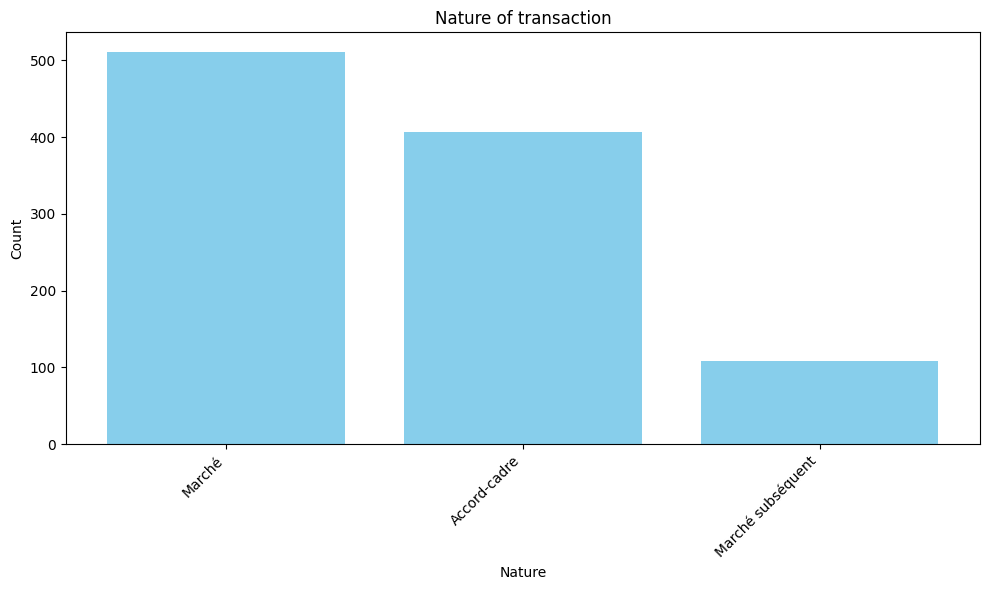

In [46]:
plt.figure(figsize=(10, 6))
plt.bar(nature_counts['nature'], nature_counts['count'], color='skyblue')
plt.xlabel('Nature')
plt.ylabel('Count')
plt.title('Nature of transaction')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

In [47]:
formeprix_counts = marseille_df['formeprix'].value_counts().reset_index()


formeprix_counts.columns = ['formeprix', 'count']

total_formeprix_count = formeprix_counts['count'].sum()

# object_counts['percentage'] = (object_counts['count'] / total_count) * 100
# object_counts.to_clipboard(index=False)

formeprix_counts.head(10)

,formeprix,count
0,Révisable,848
1,Ferme,101
2,Ferme et actualisable,78


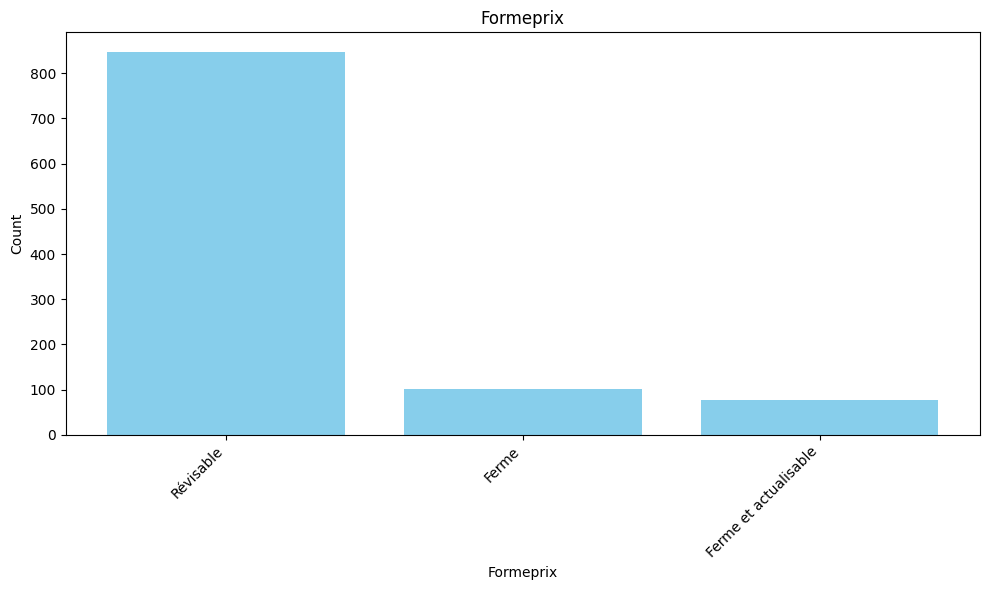

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(formeprix_counts['formeprix'], formeprix_counts['count'], color='skyblue')
plt.xlabel('Formeprix')
plt.ylabel('Count')
plt.title('Formeprix')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

In [48]:
marseille_df['datenotification'] = pd.to_datetime(marseille_df['datenotification'], errors='coerce')

marseille_df['year'] = marseille_df['datenotification'].dt.year

total_spent_by_buyer_year = marseille_df.groupby(['titulaires', 'year'])['montant'].sum().reset_index()

total_spent_by_buyer_year = total_spent_by_buyer_year.sort_values(by='montant', ascending=False)



top_20_buyers = total_spent_by_buyer_year.head(20)

# total_spent_by_buyer_year.to_clipboard(index=False, sep='\t')
total_spent_by_buyer_year.to_csv('output.csv', index=False)

total_spent_by_buyer_year

/var/folders/78/hj1hmz4d1ws3tj62xkrgpzfr0000gn/T/ipykernel_62181/45224870.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marseille_df['datenotification'] = pd.to_datetime(marseille_df['datenotification'], errors='coerce')
/var/folders/78/hj1hmz4d1ws3tj62xkrgpzfr0000gn/T/ipykernel_62181/45224870.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marseille_df['year'] = marseille_df['datenotification'].dt.year


,titulaires,year,montant
331,"['GTM SUD'], ['BYSTEEL SA'], ['LES TRAVAUX DU ...",2022,"375,760,648.98"
403,"['LES TRAVAUX DU MIDI'], ['BYSTEEL SA'], ['GTM...",2022,"250,507,099.32"
151,"['COLAS FRANCE'], ['COLAS PROJECTS']",2021,"247,247,038.28"
404,"['LES TRAVAUX DU MIDI'], ['GTM SUD'], ['BYSTEE...",2022,"208,755,916.10"
333,"['GTM SUD'], ['GREGORI PROVENCE']",2021,"194,090,718.80"
...,...,...,...
66,['ASSOCIATION FESTIVAL JAZZ DES'],2021,"42,000.00"
653,"['TERRITOIRES URBAINS ARCHITECTES'], ['EURECA ...",2023,"41,450.00"
491,['PARME AVOCATS'],2023,"40,000.00"
439,['MOSAICOGROUP'],2022,"39,999.99"


In [49]:

marseille_df['datenotification'] = pd.to_datetime(marseille_df['datenotification'], errors='coerce')

latest_date = marseille_df['datenotification'].max()

print(f"The latest date in the 'datenotification' column is: {latest_date}")

The latest date in the 'datenotification' column is: 2023-12-29 00:00:00


/var/folders/78/hj1hmz4d1ws3tj62xkrgpzfr0000gn/T/ipykernel_62181/3933590425.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marseille_df['datenotification'] = pd.to_datetime(marseille_df['datenotification'], errors='coerce')


In [50]:
pip install xlrd


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


OKAY! Here we merge with Mahaut's cpv file, which lets us see what work is being done. 

In [51]:

cpv_2008_df = pd.read_excel('cpv_2008_fr.xls')
cpv_2008_df.head()

merged_df = pd.merge(marseille_df, cpv_2008_df, left_on='codecpv', right_on='CODE', how='left')

merged_df.head()

,Unnamed: 0,codecpv,acheteur_nom,montant,datenotification,lieuexecution_typecode,acheteur_id,lieuexecution_code,uid,formeprix,...,id,_type,siren,nom,type,titulaires,year,CODE,FR,DIVISION
0,292478,18143000-3,NaN,"150,000.00",2021-08-09,Code postal,20005480700017,13567,200054807000172021Z210229A0000,Ferme,...,2021Z210229A0000,NaN,200054807,Métropole d'Aix-Marseille-Provence,MET,['APF FRANCE HANDICAP'],2021,18143000-3,Équipements de protection,"Vêtements, articles chaussants, bagages et acc..."
1,293193,50100000-6,NaN,"1,240,000.00",2021-11-02,Code postal,20005480700017,13567,200054807000172021Z210304F0000,Révisable,...,2021Z210304F0000,NaN,200054807,Métropole d'Aix-Marseille-Provence,MET,"['GARAGE GANCI'], ['GARAGE DU PLAN'], ['E2L AU...",2021,50100000-6,Services de réparation et d'entretien de véhic...,Services de réparation et d'entretien
2,293195,42923100-3,NaN,"2,077,500.00",2022-04-13,Code postal,20005480700017,13567,200054807000172022Z220015F0000,Révisable,...,2022Z220015F0000,NaN,200054807,Métropole d'Aix-Marseille-Provence,MET,['MICROMEGA'],2022,42923100-3,Machines de pesage,Machines industrielles
3,293196,45000000-7,NaN,"1,181,867.30",2022-07-19,Code postal,20005480700017,13567,200054807000172022T220388A0000,Ferme et actualisable,...,2022T220388A0000,NaN,200054807,Métropole d'Aix-Marseille-Provence,MET,['GREGORI PROVENCE'],2022,45000000-7,Travaux de construction,Travaux de construction
4,293212,71336000-2,NaN,"60,000.00",2022-01-26,Code postal,20005480700017,13567,200054807000172022Z222010A0000,Ferme,...,2022Z222010A0000,NaN,200054807,Métropole d'Aix-Marseille-Provence,MET,['FCL'],2022,71336000-2,Services d'assistance dans le domaine de l'ing...,"Services d'architecture, services de construct..."


In [52]:

num_distinct_divisions = merged_df['DIVISION'].nunique()


print("Distinct items in the 'DIVISION' column:")
print(num_distinct_divisions)

Distinct items in the 'DIVISION' column:
33


In [53]:
distinct_divisions = merged_df['DIVISION'].unique()


print("Distinct items in the 'DIVISION' column:")
print(distinct_divisions)

Distinct items in the 'DIVISION' column:
['Vêtements, articles chaussants, bagages et accessoires'
 "Services de réparation et d'entretien" 'Machines industrielles'
 'Travaux de construction'
 "Services d'architecture, services de construction, services d'ingénierie et services d'inspection"
 "Services agricoles, sylvicoles, horticoles, d'aquaculture et d'apiculture"
 "Services de technologies de l'information, conseil, développement de logiciels, Internet et appui"
 "Services d'évacuation des eaux usées et d'élimination des déchets, services d'hygiénisation et services relatifs à l'environnement"
 'Services aux entreprises : droit, marketing, conseil, recrutement, impression et sécurité'
 'Equipement de transport et produits auxiliaires pour le transport'
 'Services immobiliers' "Services financiers et d'assurance"
 "Matériaux et structures de construction; produits auxiliaires pour la construction (à l'exception des appareils électriques)"
 'Matériels médicaux, pharmaceutiques et pro

In [56]:
division_stats = merged_df.groupby('DIVISION').agg(
    count=('codecpv', 'size'),
    total_spent=('montant', 'sum')
).reset_index()
division_stats = division_stats.sort_values(by='total_spent', ascending=False)


division_stats

,DIVISION,count,total_spent
31,Travaux de construction,340,"2,440,573,286.65"
26,Services de transport (à l'exclusion du transp...,40,"718,983,283.11"
21,Services d'évacuation des eaux usées et d'élim...,39,"353,592,834.29"
17,"Services d'architecture, services de construct...",164,"175,829,814.96"
4,"Equipements et appareils de radio, de télévisi...",12,"105,760,193.14"
25,"Services de technologies de l'information, con...",59,"85,215,587.40"
15,"Services aux entreprises : droit, marketing, c...",91,"83,248,210.42"
2,Equipement de transport et produits auxiliaire...,46,"59,745,282.22"
23,Services de réparation et d'entretien,63,"59,289,881.97"
13,"Produits pétroliers, combustibles, électricité...",6,"53,595,366.24"


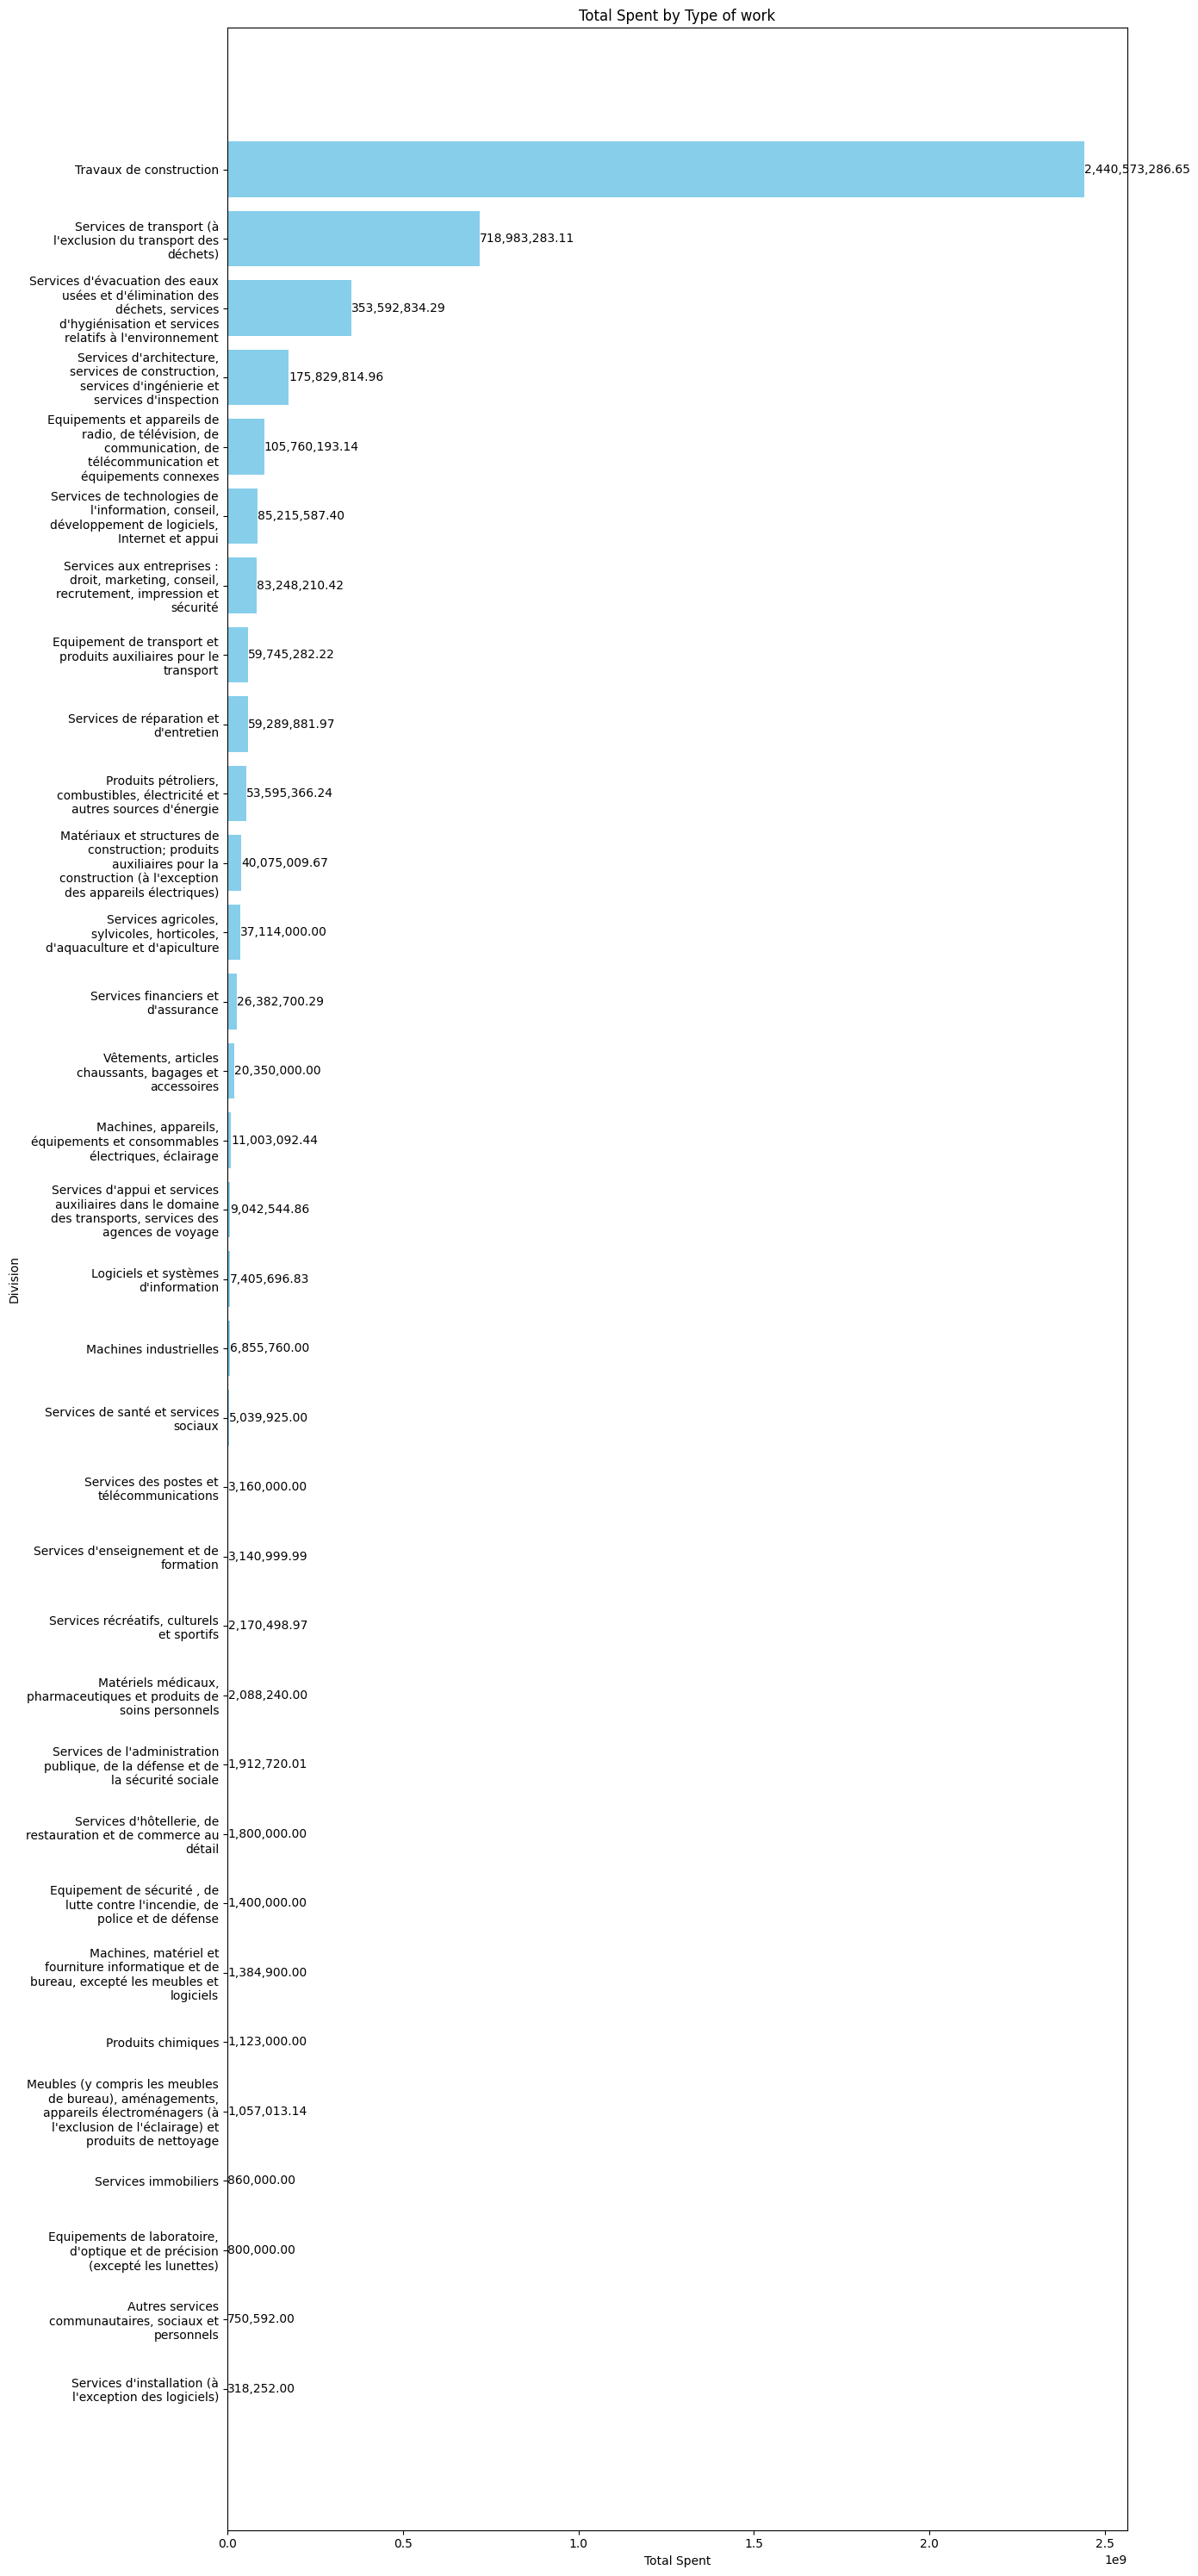

In [57]:
division_stats['DIVISION'] = division_stats['DIVISION'].apply(lambda x: '\n'.join(textwrap.wrap(x, width=30)))

plt.figure(figsize=(14,30))
bars = plt.barh(division_stats['DIVISION'], division_stats['total_spent'], color='skyblue')


for bar in bars:
    xval = bar.get_width()
    plt.text(xval, bar.get_y() + bar.get_height()/2, f'{xval:,.2f}', ha='left', va='center')

plt.xlabel('Total Spent')
plt.ylabel('Division')
plt.title('Total Spent by Type of work')
plt.gca().invert_yaxis()  
plt.tight_layout()


plt.show()

/var/folders/78/hj1hmz4d1ws3tj62xkrgpzfr0000gn/T/ipykernel_62181/2191555550.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_15_divisions['DIVISION'] = top_15_divisions['DIVISION'].apply(lambda x: '\n'.join(textwrap.wrap(x, width=30)))


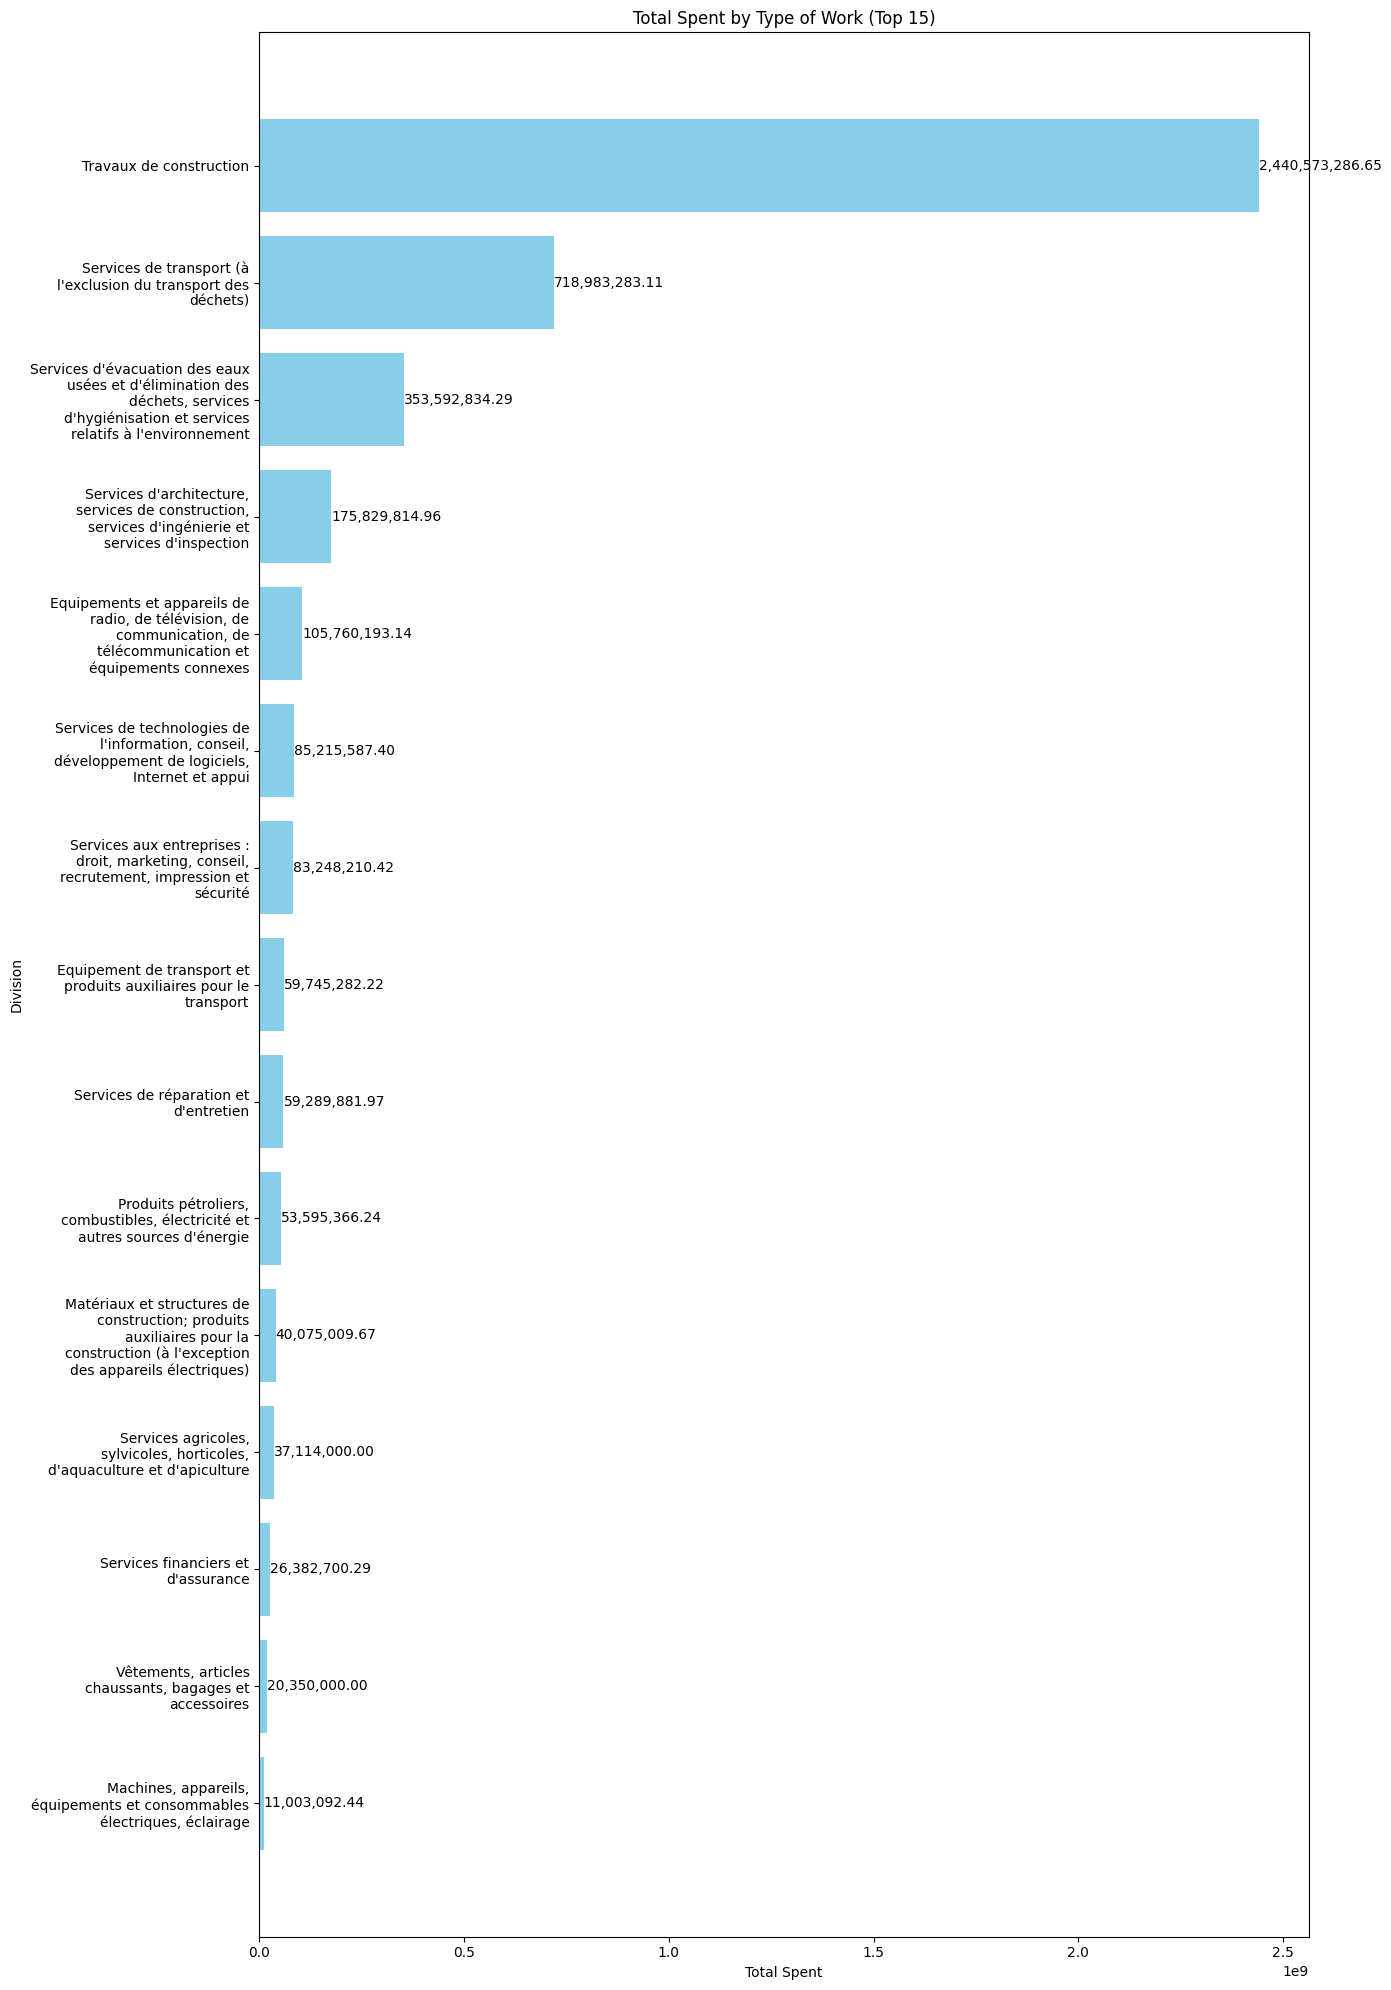

In [58]:
top_15_divisions = division_stats.head(15)


top_15_divisions['DIVISION'] = top_15_divisions['DIVISION'].apply(lambda x: '\n'.join(textwrap.wrap(x, width=30)))


plt.figure(figsize=(14, 20))
bars = plt.barh(top_15_divisions['DIVISION'], top_15_divisions['total_spent'], color='skyblue')


for bar in bars:
    xval = bar.get_width()
    plt.text(xval, bar.get_y() + bar.get_height()/2, f'{xval:,.2f}', ha='left', va='center')

plt.xlabel('Total Spent')
plt.ylabel('Division')
plt.title('Total Spent by Type of Work (Top 15)')
plt.gca().invert_yaxis() 
plt.tight_layout()


plt.show()

In [59]:
num_montant_zero = (marseille_df['montant'] == 0).sum()


num_montant_below_40000 = (marseille_df['montant'] < 40000).sum()
num_montant_39500 = (marseille_df['montant'] == 39500).sum()
lowest_non_zero_montant = marseille_df[marseille_df['montant'] > 0]['montant'].min()
highest_montant = marseille_df[marseille_df['montant'] > 0]['montant'].max()


print(f"Number of times 'montant' is equal to 0: {num_montant_zero}")
print(f"Number of times 'montant' is below 40,000: {num_montant_below_40000}")
print(f"Number of times 'montant' is 39500: {num_montant_39500}")
print(f"Lowest non-zero value of 'montant': {lowest_non_zero_montant}")
print(f"Highest value of 'montant': {highest_montant}")

Number of times 'montant' is equal to 0: 0
Number of times 'montant' is below 40,000: 2
Number of times 'montant' is 39500: 1
Lowest non-zero value of 'montant': 39500.0
Highest value of 'montant': 80600000.0


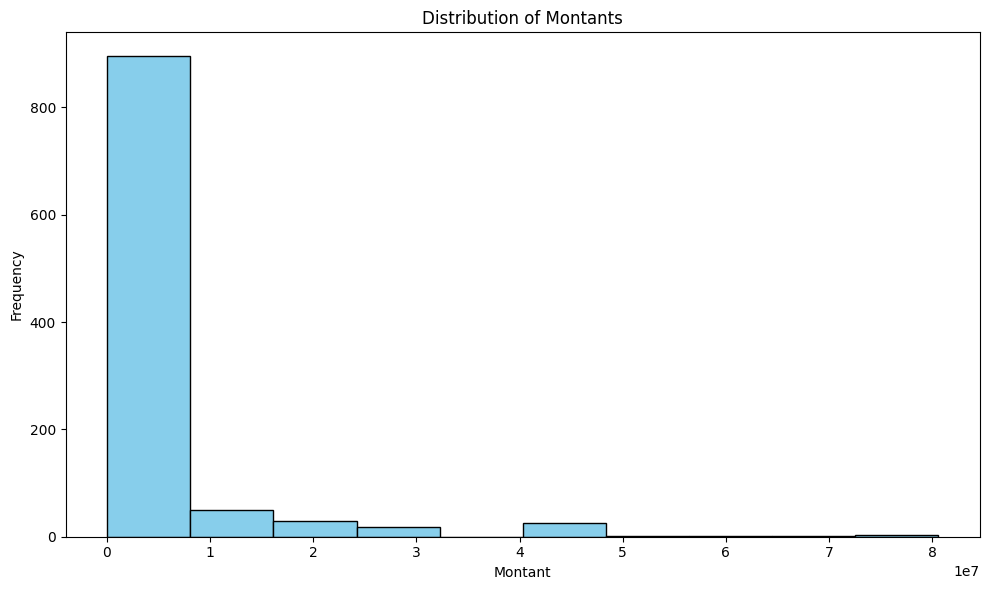

In [60]:
# Plot the histogram of 'montant'
plt.figure(figsize=(10, 6))
plt.hist(marseille_df['montant'], bins=10, color='skyblue', edgecolor='black')

plt.xlabel('Montant')
plt.ylabel('Frequency')
plt.title('Distribution of Montants')
plt.tight_layout()

# Display the plot
plt.show()

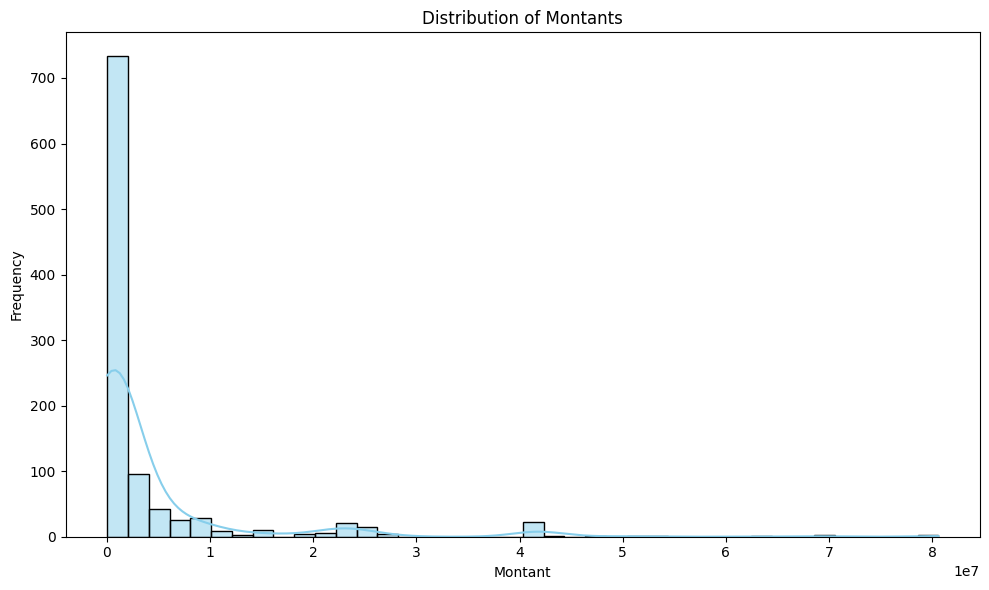

In [61]:
plt.figure(figsize=(10, 6))
sns.histplot(marseille_df['montant'], bins=40, kde=True, color='skyblue', edgecolor='black')

plt.xlabel('Montant')
plt.ylabel('Frequency')
plt.title('Distribution of Montants')
plt.tight_layout()

# Display the plot
plt.show()

In [62]:
marseille_df['montant'].describe()

count        1,027.00
mean     4,207,467.07
std      9,918,141.56
min         39,500.00
25%        149,178.42
50%        600,000.00
75%      2,995,983.77
max     80,600,000.00
Name: montant, dtype: float64

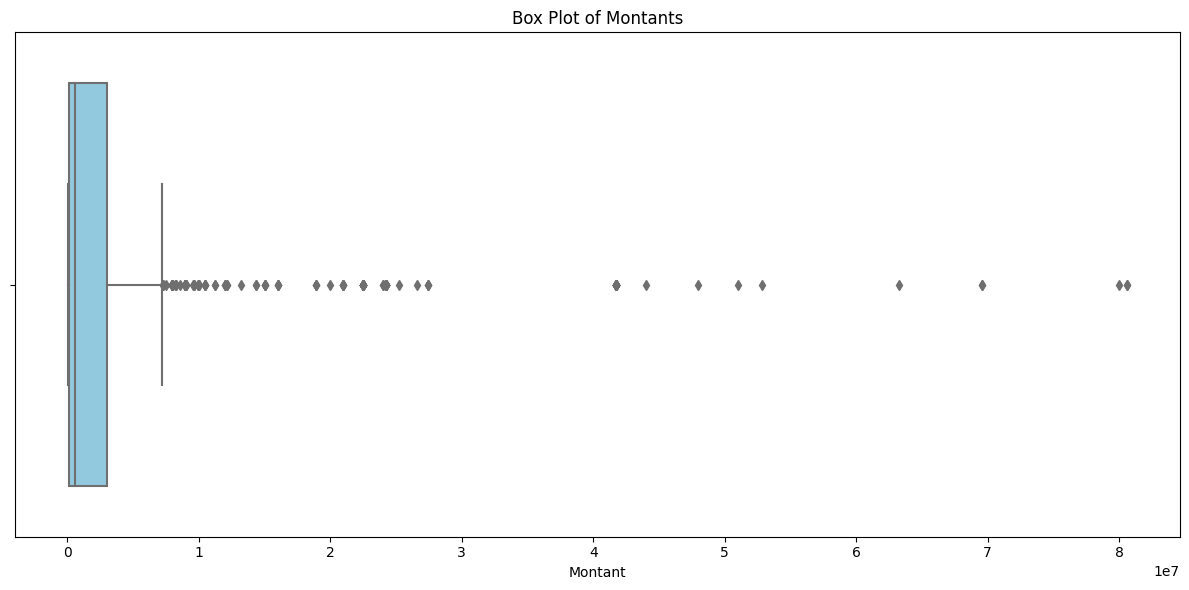

In [63]:
plt.figure(figsize=(12, 6))

# Create the box plot
sns.boxplot(x=marseille_df['montant'], color='skyblue')

plt.xlabel('Montant')
plt.title('Box Plot of Montants')
plt.tight_layout()

# Display the plot